In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df =pd.read_csv('ushape.csv')
df

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [30]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

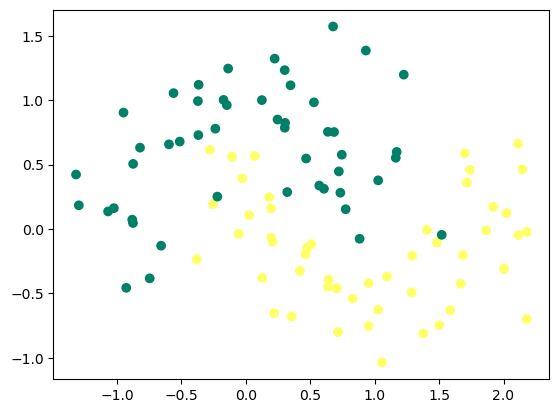

In [31]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')

# Linear decision line

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [33]:
lr.fit(X,y)

LogisticRegression()

<Axes: >

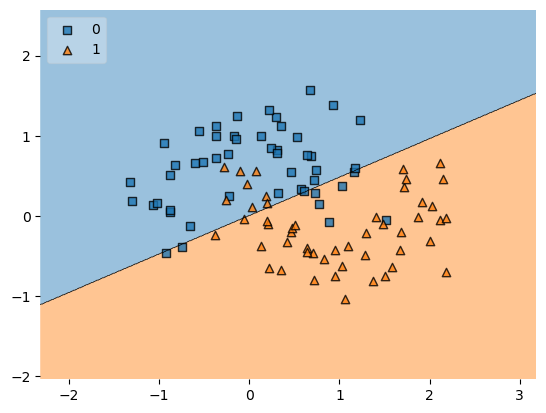

In [34]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y.astype('int'),lr,legend=2)

In [35]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr,X,y,scoring='accuracy',cv=10))

0.8300000000000001

# Non-linear decision line

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)

X_trf = poly.fit_transform(X)
lr_poly = LogisticRegression()

In [37]:
np.mean(cross_val_score(lr_poly,X_trf,y,scoring='accuracy',cv=10))

0.9099999999999999

# Non-linear decision boundary maker

In [63]:
def non_linear_decision_boundary(X,y,degree=1):
    # polynomial conversion
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    

    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    x_range = np.arange(start=X[:,0].min()-1,stop=X[:,0].max()+1, step=0.01)
    y_range = np.arange(start=X[:,1].min()-1,stop=X[:,1].max()+1, step=0.01)
    
    XX, YY = np.meshgrid(x_range,y_range)
    
    input_array = np.array([XX.ravel(),YY.ravel()]).T
    input_array_trans = poly.transform(input_array)
    
    y_pred = clf.predict(input_array_trans)
    
    plt.contourf(XX,YY,y_pred.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
    plt.title('Degree = {}, accuracy is {}'.format(degree,accuracy,6))

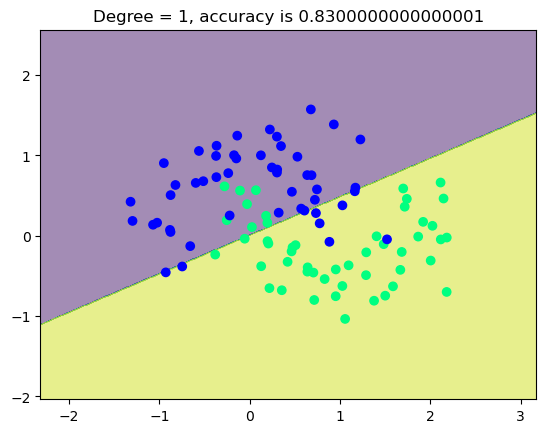

In [64]:
non_linear_decision_boundary(X,y,degree=1)

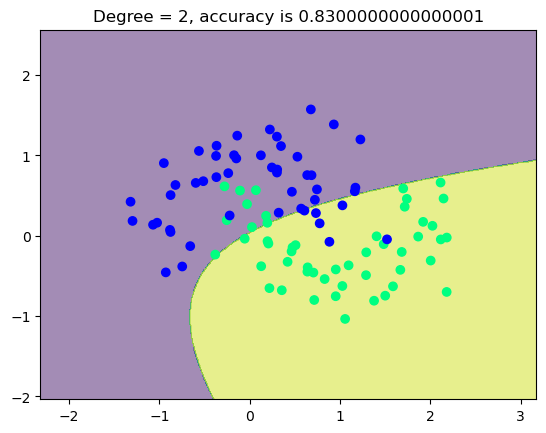

In [65]:
non_linear_decision_boundary(X,y,degree=2)

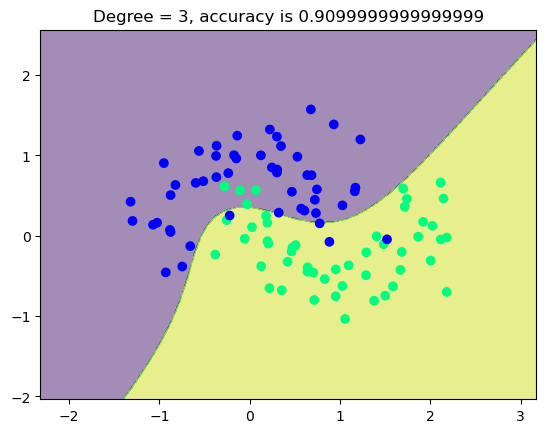

In [66]:
non_linear_decision_boundary(X,y,degree=3)

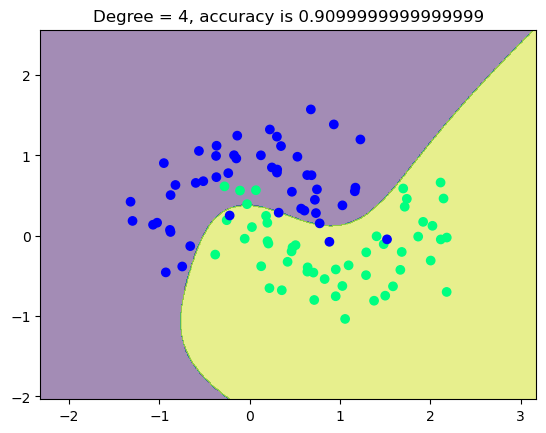

In [67]:
non_linear_decision_boundary(X,y,degree=4)

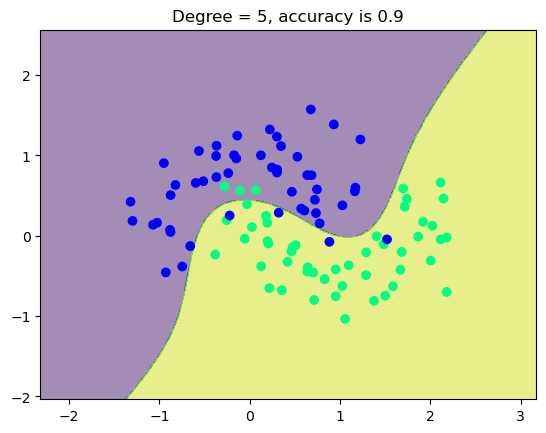

In [69]:
non_linear_decision_boundary(X,y,degree=5)

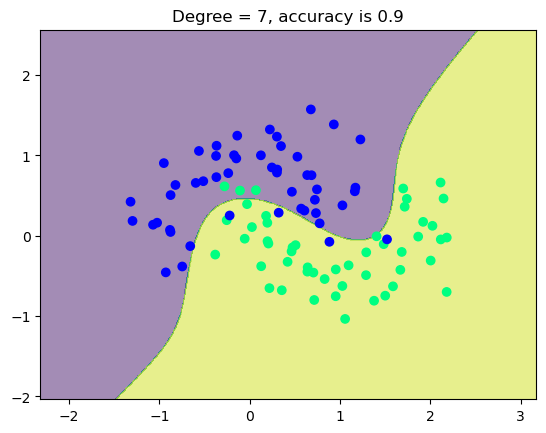

In [62]:
non_linear_decision_boundary(X,y,degree=7)